Import the Libraries

In [146]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image
from IPython.display import display

In [85]:
tf.__version__

'2.18.0'

Preprocessing the Training Set

In [87]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("dataset/training_set",
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


Preprocessing the Test Set

In [89]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory("dataset/test_set",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


Install the Convolutional Neural Network

In [91]:
cnn = tf.keras.models.Sequential()

Define the Input Layer

In [93]:
input_layer = tf.keras.layers.Input(shape=(64, 64, 3))

Create the Convolution Neural Network Model

In [95]:
cnn.add(input_layer)  # Add the input layer to the model
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

Pooling

In [97]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a second convolutinal layer

In [99]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Flattening

In [101]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [103]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

Output Layer

In [105]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Compiling the CNN

In [107]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training the Convolutional Nueral Network

In [109]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 103ms/step - accuracy: 0.5215 - loss: 0.7022 - val_accuracy: 0.5885 - val_loss: 0.6915
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.6405 - loss: 0.6408 - val_accuracy: 0.7035 - val_loss: 0.5895
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7066 - loss: 0.5792 - val_accuracy: 0.7300 - val_loss: 0.5429
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.7210 - loss: 0.5485 - val_accuracy: 0.7500 - val_loss: 0.5055
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.7434 - loss: 0.5133 - val_accuracy: 0.7705 - val_loss: 0.4877
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.7506 - loss: 0.4998 - val_accuracy: 0.7605 - val_loss: 0.4895
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.7618 - loss: 0.4857 - val_accuracy: 0.7520 - val_loss: 0.5605
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.7834 - loss: 0.4629 

Making a single prediction

In [111]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


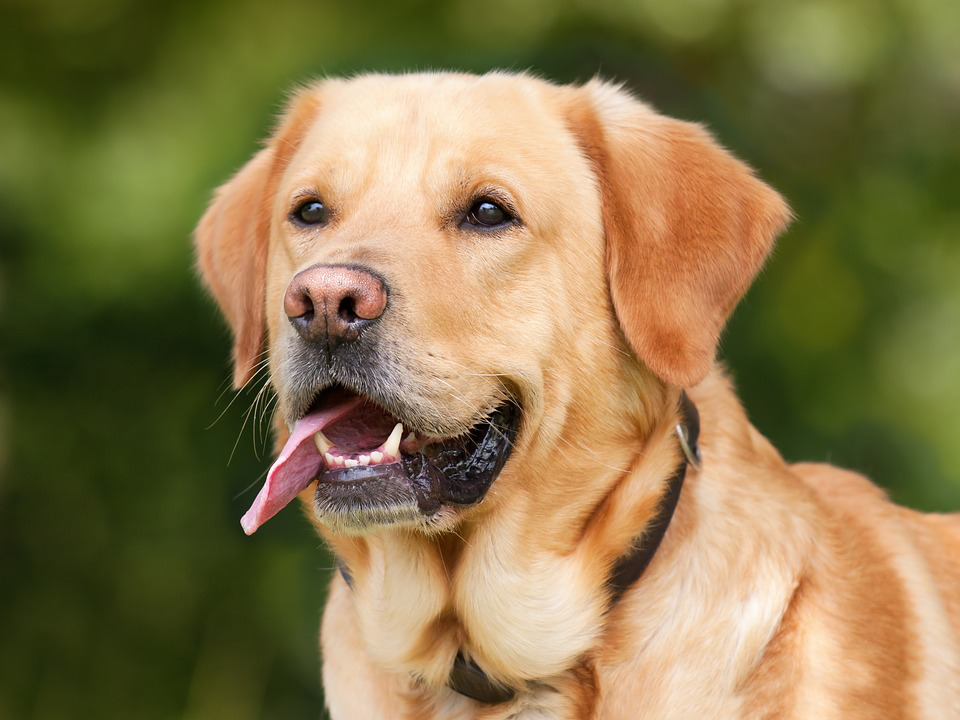

dog


In [150]:
img = Image.open('dataset/single_prediction/cat_or_dog_1.jpg')
display(img)
print(prediction)